# Worldwide Governance Indicators

## Importation des librairies et des données

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
wgi = pandas.read_csv("https://fxjollois.github.io/donnees/WGI/wgi2019.csv")
wgi

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
4,Anguilla,AIA,NaN,1.367357,0.815824,0.846231,0.355737,1.234392
...,...,...,...,...,...,...,...,...
209,Serbia,SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
210,South Africa,ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
211,"Congo, Dem. Rep.",ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931
212,Zambia,ZMB,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069,-0.640345


In [3]:
wgi_qt = wgi.set_index("Code").drop(columns = "Country").dropna()
wgi_qt

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
Code,,,,,,
ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758
...,...,...,...,...,...,...
SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931


## CAH

In [4]:
hac_complet = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(wgi_qt)

In [5]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

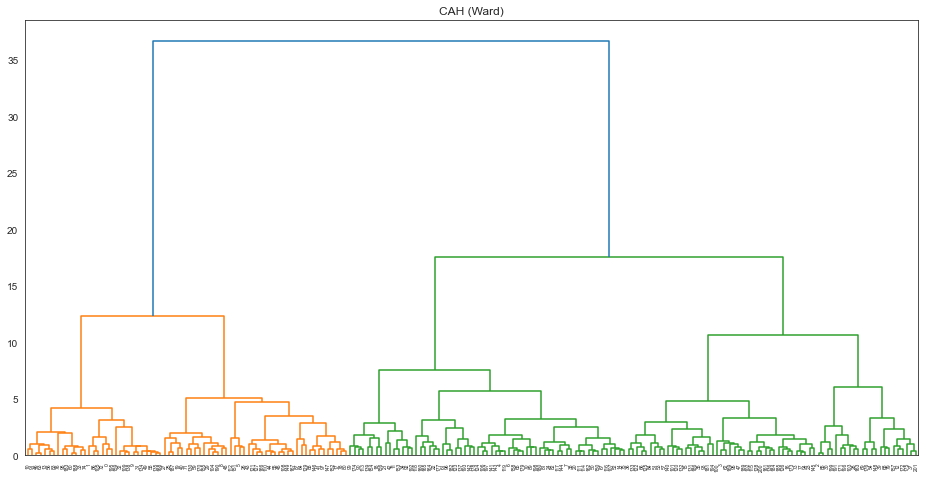

In [6]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac_complet)
plt.show()

In [7]:
hac = AgglomerativeClustering().fit(wgi_qt)

La CAH propose donc une partition en 2 classes

In [8]:
hac.n_clusters_

2

In [9]:
hac.labels_

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

## $k$-means

In [10]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 30).fit(wgi_qt)
    inertia = inertia + [kmeans.inertia_]
n = wgi_qt.shape[0]
I = inertia[0]
B = [I - w for w in inertia]
R2 = [b / I for b in B]
PsF = [None] + [(R2[k] / k) / ((1 - R2[k]) / (n - k - 1)) for k in range(1, 10)]
crit = pandas.DataFrame({"k": range(1, 11), "W": inertia, "B": B, "R2": R2, "PsF": PsF})
crit.round(2)

,k,W,B,R2,PsF
0,1,1202.76,0.00,0.00,NaN
1,2,510.70,692.05,0.58,271.02
2,3,347.15,855.61,0.71,245.23
3,4,268.72,934.04,0.78,229.41
4,5,231.04,971.72,0.81,207.14
5,6,205.56,997.20,0.83,190.16
6,7,182.96,1019.80,0.85,181.15
7,8,171.57,1031.19,0.86,166.57
8,9,154.35,1048.40,0.87,163.86
9,10,146.08,1056.68,0.88,154.32


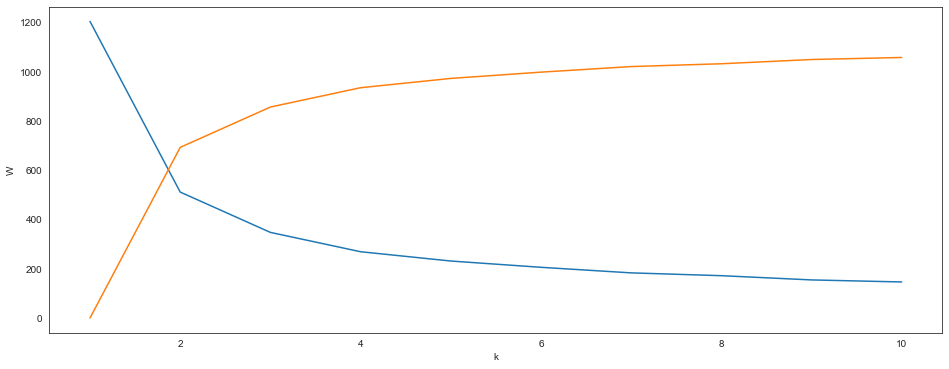

In [11]:
plt.figure(figsize = (16, 6))
seaborn.lineplot(data = crit, x = "k", y = "W")
seaborn.lineplot(data = crit, x = "k", y = "B")
plt.show()

Le critère $R^2$ propose 2 ou 3 classes, là où *Pseudo-F$ propose plutôt 2 classes uniquement.

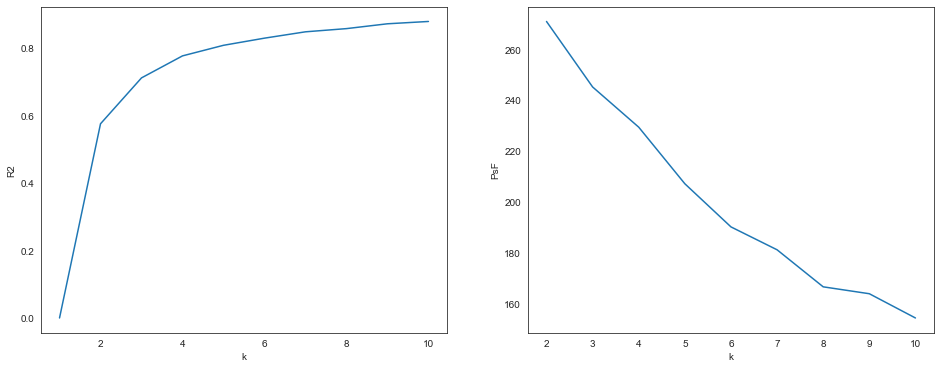

In [12]:
fig, axs= plt.subplots(1, 2, figsize=(16, 6))
seaborn.lineplot(data = crit, x = "k", y = "R2", ax = axs[0])
seaborn.lineplot(data = crit, x = "k", y = "PsF", ax = axs[1])
plt.show()

In [13]:
kmeans2 = KMeans(n_clusters = 2).fit(wgi_qt)

In [14]:
kmeans2.labels_

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0], dtype=int32)

## DBSCAN

Après recherche empirique, on obtient 4 classes, et 22 outliers

In [15]:
db = DBSCAN(eps = 0.8, min_samples = 3).fit(wgi_qt)
pandas.Series(db.labels_).value_counts()

 0    168
-1     22
 1      5
 3      4
 2      3
dtype: int64

## Comparaison des résultats

In [16]:
resultats = wgi_qt.assign(CAH = hac.labels_, kmeans = kmeans2.labels_, DBSCAN = db.labels_)
resultats

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,CAH,kmeans,DBSCAN
Code,,,,,,,,,
ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238,1,1,0
ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392,1,1,0
AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076,0,0,0
AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683,0,0,0
ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758,0,0,0
...,...,...,...,...,...,...,...,...,...
SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551,0,0,0
ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924,0,1,0
ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931,0,0,0


In [17]:
resultats.groupby("CAH").mean()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,kmeans,DBSCAN
CAH,,,,,,,,
0,-0.498394,-0.536321,-0.615752,-0.603835,-0.633716,-0.641430,0.069767,0.085271
1,0.854999,0.824537,1.006136,0.996369,1.032080,1.023469,1.000000,-0.136986


In [18]:
resultats.groupby("kmeans").mean()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,CAH,DBSCAN
kmeans,,,,,,,,
0,-0.586609,-0.630458,-0.666734,-0.638075,-0.701083,-0.699567,0.000000,0.100000
1,0.835551,0.812936,0.902733,0.870845,0.947833,0.925814,0.890244,-0.134146


In [19]:
resultats.groupby("DBSCAN").mean()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,CAH,kmeans
DBSCAN,,,,,,,,
-1,-0.516650,0.114032,0.344237,0.186419,0.197575,0.316522,0.454545,0.500000
0,0.185067,0.017870,0.011992,0.055235,0.036139,0.004993,0.375000,0.422619
1,-1.802860,-2.600834,-2.120310,-2.004176,-2.003509,-1.691468,0.000000,0.000000
2,-1.401908,-0.063985,0.227347,-0.123245,-0.241344,-0.385773,0.000000,0.000000
3,-2.095733,-0.327255,-1.413102,-2.037457,-1.521014,-1.554729,0.000000,0.000000


In [20]:
pandas.crosstab(index = resultats["CAH"], 
                columns = resultats["kmeans"],
                margins = True)

kmeans,0,1,All
CAH,,,
0,120,9,129
1,0,73,73
All,120,82,202


In [21]:
pandas.crosstab(index = resultats["CAH"], 
                columns = resultats["DBSCAN"],
                margins = True)

DBSCAN,-1,0,1,2,3,All
CAH,,,,,,
0,12,105,5,3,4,129
1,10,63,0,0,0,73
All,22,168,5,3,4,202


In [22]:
pandas.crosstab(index = resultats["kmeans"], 
                columns = resultats["DBSCAN"],
                margins = True)

DBSCAN,-1,0,1,2,3,All
kmeans,,,,,,
0,11,97,5,3,4,120
1,11,71,0,0,0,82
All,22,168,5,3,4,202


### Sur l'ACP

In [23]:
pca = PCA(n_components = 2).fit(wgi_qt)

In [24]:
df_pca = pandas.DataFrame(pca.transform(wgi_qt), columns = ["Dim1", "Dim2"]) \
    .assign(CAH = hac.labels_, kmeans = kmeans2.labels_, DBSCAN = db.labels_)
df_pca

,Dim1,Dim2,CAH,kmeans,DBSCAN
0,-2.921523,0.503627,1,1,0
1,-3.630601,0.075195,1,1,0
2,3.704414,-0.846353,0,0,0
3,2.083839,0.446336,0,0,0
4,0.137824,0.175896,0,0,0
...,...,...,...,...,...
197,0.134034,-0.035217,0,0,0
198,-0.469483,-0.010186,0,1,0
199,3.856331,-0.236763,0,0,0
200,1.060152,0.400094,0,0,0


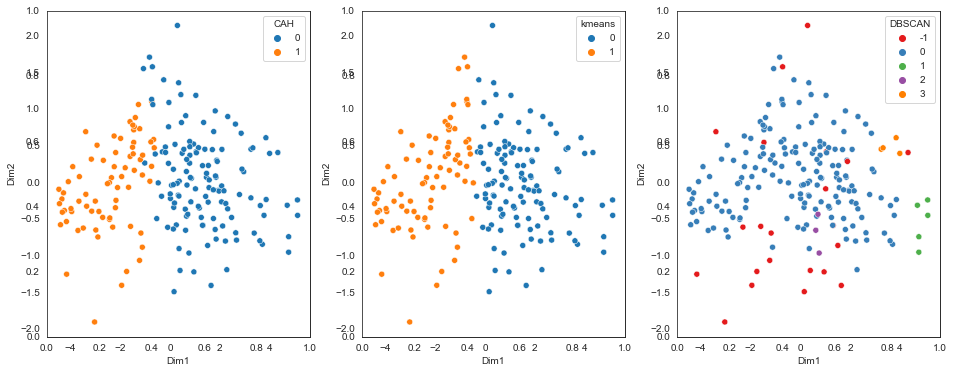

In [25]:
fig, axs= plt.subplots(1, 3, figsize=(16, 6))
ax1 = fig.add_subplot(1, 3, 1)
seaborn.scatterplot(x = "Dim1", y = "Dim2", hue = "CAH", data = df_pca)
ax1 = fig.add_subplot(1, 3, 2)
seaborn.scatterplot(x = "Dim1", y = "Dim2", hue = "kmeans", data = df_pca)
ax1 = fig.add_subplot(1, 3, 3)
seaborn.scatterplot(x = "Dim1", y = "Dim2", hue = "DBSCAN", data = df_pca, palette = "Set1")
plt.show()